# Store turnover forecasting using ARIMA

In [47]:
#import neccesary libraries
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tools.sm_exceptions import ConvergenceWarning #change add
warnings.simplefilter('ignore', ConvergenceWarning)#change add
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
import os


In [48]:
data = pd.read_csv(r"C:\Users\work\Downloads\q3.csv",parse_dates=True)
data.head()

,date,to_type,sport,store,turnover,quantity,nb_transaction
0,8/1/2017 0:00,offline,FITNESS,1618,1194.12,116.95,144.83
1,8/1/2017 0:00,offline,JOG/RUN,1614,2125.06,132.74,112.07
2,8/1/2017 0:00,offline,PILATES,1614,1075.12,92.17,94.53
3,8/1/2017 0:00,offline,PILATES,1618,656.51,101.55,109.72
4,8/1/2017 0:00,online,DIVING,191,648.71,50.06,16.28


In [49]:
#checking which stores we have
data["date"] = pd.to_datetime(data["date"])
data["store"].value_counts()

1618    22744
1614    20082
191     16089
2350     3780
Name: store, dtype: int64

In [50]:
#splitting the files per store
store_1618 = data[data["store"]==1618]
store_1614 = data[data["store"]==1614]
store_191 = data[data["store"]==191]
store_2350 = data[data["store"]==2350]

# Forecasting the different store's turnovers using ARIMA model

### ARIMA
ARIMA stands for Auto-Regressive Integrated Moving Average. There are three integers (p, d, q) that are used to parametrize ARIMA models. Because of that, a nonseasonal ARIMA model is denoted with ARIMA(p, d, q).

- p - Specifies the order of time lag.

- d - Specifies the degree of differencing

- q - Specifies order of moving average.

## store 1618


In [51]:
#arima=univariate analysis, only need 1 column aside from date
store_1618 = store_1618[["date","turnover"]]

#arima needs stationary data, need adfuller to check p value later on
test_result=adfuller(store_1618["turnover"])

In [52]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(turnover):
    result=adfuller(turnover)
    labels = ["ADF Test Statistic","p-value","#Lags Used","Number of Observations Used"]
    for value,label in zip(result,labels):
        print(label+" : "+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [53]:
adfuller_test(store_1618["turnover"])

ADF Test Statistic : -17.220194274497235
p-value : 6.287121149447918e-30
#Lags Used : 35
Number of Observations Used : 22708
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [54]:
#set date as index column and resample my mean of month and show as month start (instead of daily)
store_1618=store_1618.set_index("date")
store_1618_monthly = store_1618["turnover"].resample("MS").mean()
store_1618_monthly 

date
2017-08-01    8252.95
2017-09-01    6088.28
2017-10-01    6538.66
2017-11-01    7048.58
2017-12-01   10326.63
2018-01-01    7632.70
2018-02-01    6409.66
2018-03-01    7947.46
2018-04-01    8313.41
2018-05-01    8396.62
2018-06-01    9080.68
2018-07-01    9226.28
2018-08-01    7788.15
2018-09-01    7223.73
2018-10-01    8831.25
2018-11-01   10351.40
2018-12-01   14674.16
2019-01-01   10372.07
2019-02-01    8597.85
2019-03-01    9211.91
2019-04-01   11011.94
2019-05-01    9976.78
2019-06-01   11094.20
2019-07-01   13176.36
2019-08-01   11313.68
2019-09-01    9100.27
2019-10-01    7233.23
Freq: MS, Name: turnover, dtype: float64

C:\Users\work\AppData\Local\Continuum\anaconda3\envs\FTDS\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\work\AppData\Local\Continuum\anaconda3\envs\FTDS\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


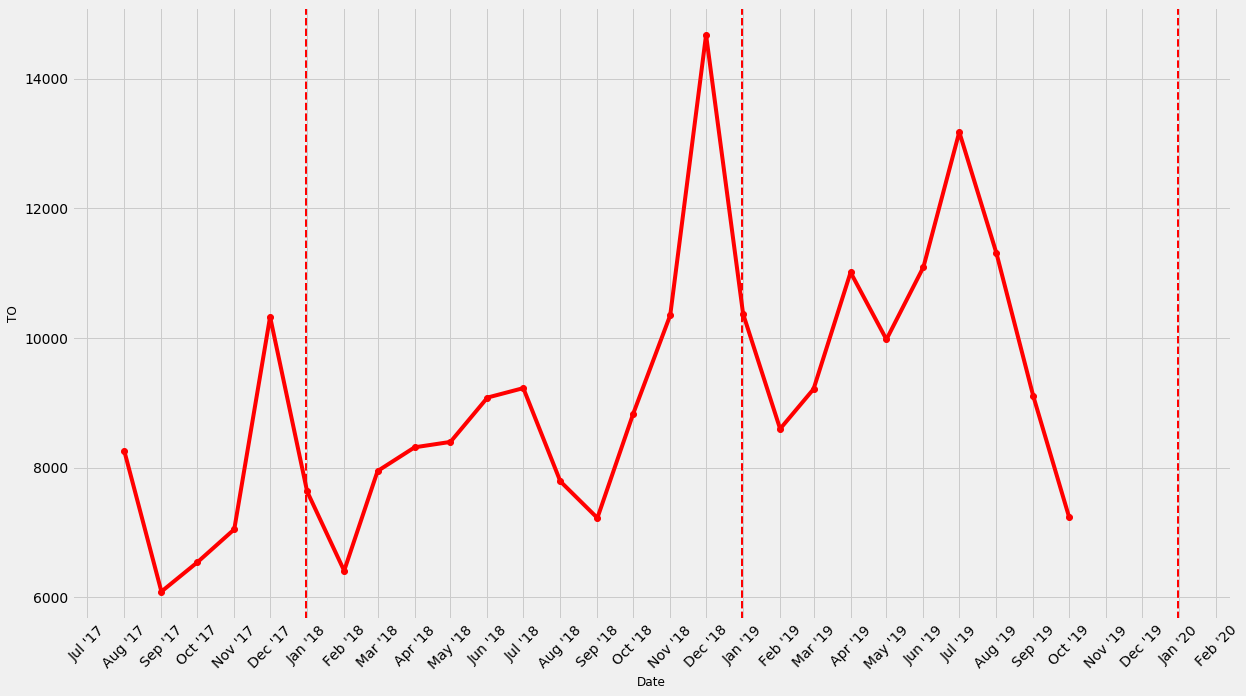

In [55]:
#visual test for seasonality 
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

t = store_1618_monthly.index.values

values = store_1618_monthly

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.plot_date(t, values, 'ro',linestyle='solid')
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=12)
plt.ylabel('TO', fontsize=12)

months = MonthLocator()
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.axvline(pd.to_datetime('2017-12-31'), color='r', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2018-12-31'), color='r', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2019-12-31'), color='r', linestyle='--', lw=2)

plt.show()

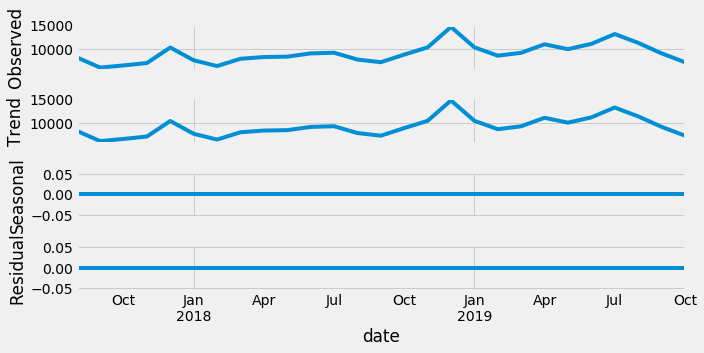

date
2017-08-01    8252.95
2017-09-01    6088.28
2017-10-01    6538.66
2017-11-01    7048.58
2017-12-01   10326.63
2018-01-01    7632.70
2018-02-01    6409.66
2018-03-01    7947.46
2018-04-01    8313.41
2018-05-01    8396.62
2018-06-01    9080.68
2018-07-01    9226.28
2018-08-01    7788.15
2018-09-01    7223.73
2018-10-01    8831.25
2018-11-01   10351.40
2018-12-01   14674.16
2019-01-01   10372.07
2019-02-01    8597.85
2019-03-01    9211.91
2019-04-01   11011.94
2019-05-01    9976.78
2019-06-01   11094.20
2019-07-01   13176.36
2019-08-01   11313.68
2019-09-01    9100.27
2019-10-01    7233.23
Freq: MS, Name: turnover, dtype: float64
date
2017-08-01   0.00
2017-09-01   0.00
2017-10-01   0.00
2017-11-01   0.00
2017-12-01   0.00
2018-01-01   0.00
2018-02-01   0.00
2018-03-01   0.00
2018-04-01   0.00
2018-05-01   0.00
2018-06-01   0.00
2018-07-01   0.00
2018-08-01   0.00
2018-09-01   0.00
2018-10-01   0.00
2018-11-01   0.00
2018-12-01   0.00
2019-01-01   0.00
2019-02-01   0.00
2019-03-01   

In [56]:
#inbuilt visual test for seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams["figure.figsize"] = (10,5)

nresult = seasonal_decompose(store_1618_monthly, model='additive', freq=1)
nresult.plot()
plt.show()
print(nresult.trend)
print(nresult.seasonal)
print(nresult.resid)
print(nresult.observed)


In [57]:
#starting to set ARIMA
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

p2 = d2 = q2 = range(0, 3) # second set of p's, d's, and q's
pdq2 = list(itertools.product(p2,d2,q2)) # simular too code above but for seasonal parameters
s = 12 # here I use twelve but the number here is representative of the periodicty of the seasonal cycle
seasonal_pdq = [(c[0], c[1], c[2], s) for c in pdq2]

In [58]:
#Hyperparameter tuning, use itertools to iterate over pd,q, combinations
#looking to chose p,d,q, and seasonal p,d,q, with a low AIC 
aiclist=[]
paramlist=[]
seasparamlist=[]


for param in pdq:
    for param_seasonal in seasonal_pdq:
        model_arima = sm.tsa.statespace.SARIMAX(store_1618_monthly,order=param,
                                               seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        start_params = np.r_[[0] * (model_arima.k_params - 1), 1] #change add whole statement

        model_arima_fit = model_arima.fit(start_params=start_params) #change add parameter
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, model_arima_fit.aic))
        aiclist.append(model_arima_fit.aic)
        seasparamlist.append(param_seasonal)
        paramlist.append(param)

    

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:551.2044029618636
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:267.83392654442747
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:41.356810408680545
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:262.4291783044652
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:39.5016165896441
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:39.45965353538432
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:266.23656882025097
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:249.74213162191302
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:41.616286566541135
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:59.16693224741691
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:41.41962079117875
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:54.89895041934469
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:57.198165002

C:\Users\work\AppData\Local\Continuum\anaconda3\envs\FTDS\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:947: RuntimeWarning: invalid value encountered in true_divide
  (self.nobs - self.ssm.loglikelihood_burn)


ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 2)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 2)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:268.37709254261233
ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:223.16082237444041
ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:60.26495905241945
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:54.15224251566404
ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:56.17245958739228
ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:451.1019781222387

ARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 2, 2)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 2, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:470.9479845996375
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:253.71577755810551
ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:29.028702483268113
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:247.66815751757983
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:40.91413571292605
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:41.42708802108562
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:247.375940024609
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:250.22738326040835
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:15.570117531804641
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:39.81947930811003
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:41.811317285556925
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(1

ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:216.9615639303444
ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:218.66954201167468
ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(1, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(2, 0, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(2, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 0)x(2, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 0)x(2, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 2, 0)x(2, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:433.79248650863184
ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:201.2697435467949
ARIMA(1, 2, 1)x(0, 0, 2, 12)12 - AIC:10.0
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:200.98859326674045
ARIMA(1, 2, 1)x

ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:436.68891029947997
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:229.58488176535113
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:217.25409665954345
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:8.0
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:219.01756187079033
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:221.19632593595546
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:12.0
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:14.0
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(2

In [59]:
#change
pd.options.display.float_format = '{:.2f}'.format #to suppress scientific notation
test=pd.DataFrame(list(zip(paramlist,seasparamlist,aiclist)),columns=["param","param_seas","aic"]) #chg
test=test.sort_values("aic")
ns_order=test["param"].iloc[0]
s_order=test["param_seas"].iloc[0]


In [60]:
#chose p,d,q and seasonal p,d,q values with low AIC and fit model

arima_store_1618 = sm.tsa.statespace.SARIMAX(store_1618_monthly,order=ns_order,seasonal_order=s_order, #change seasonal order is the problem
                                eenforce_invertibility=False)
start_params = np.r_[[0] * (arima_store_1618.k_params - 1), 1] #change add whole statement
results = arima_store_1618 .fit(start_params=start_params)

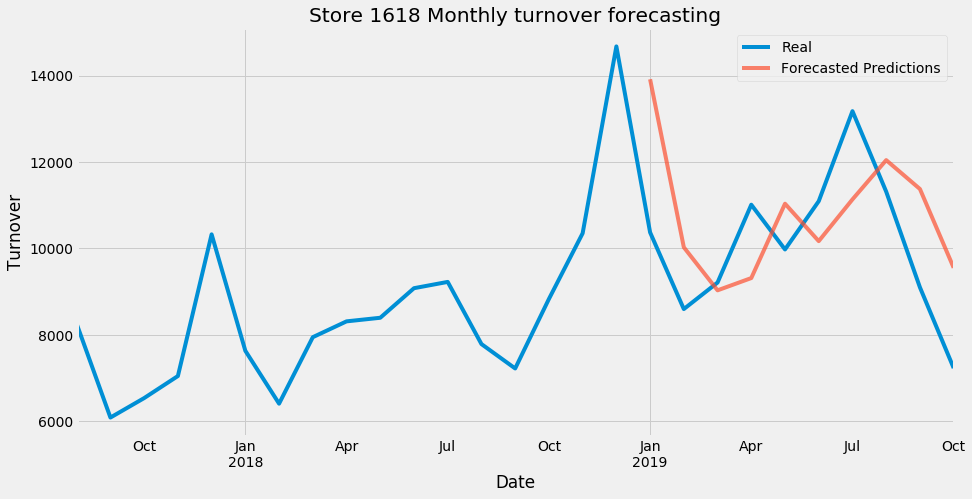

The Root Mean Squared Error of our forecasts is 1863.91


In [61]:
#set predictions on timeframe where we have actual data to see how well the model works and check mean squared error
pred = results.get_prediction("2019-01-01", dynamic=False)
ax = store_1618_monthly["2017":].plot(label="Real")
pred.predicted_mean.plot(ax=ax, label="Forecasted Predictions", alpha=.7, figsize=(14, 7))
ax.set_xlabel("Date")
ax.set_ylabel("Turnover")
plt.legend()
plt.title("Store 1618 Monthly turnover forecasting")
plt.show()
y_forecasted = pred.predicted_mean
y_truth = store_1618_monthly["2017-08-01":]
mse = ((y_forecasted - y_truth) ** 2).mean()
print("The Root Mean Squared Error of our forecasts is {}".format(round(np.sqrt(mse), 2)))

In [62]:
y_truth.mean()

9082.181746891167

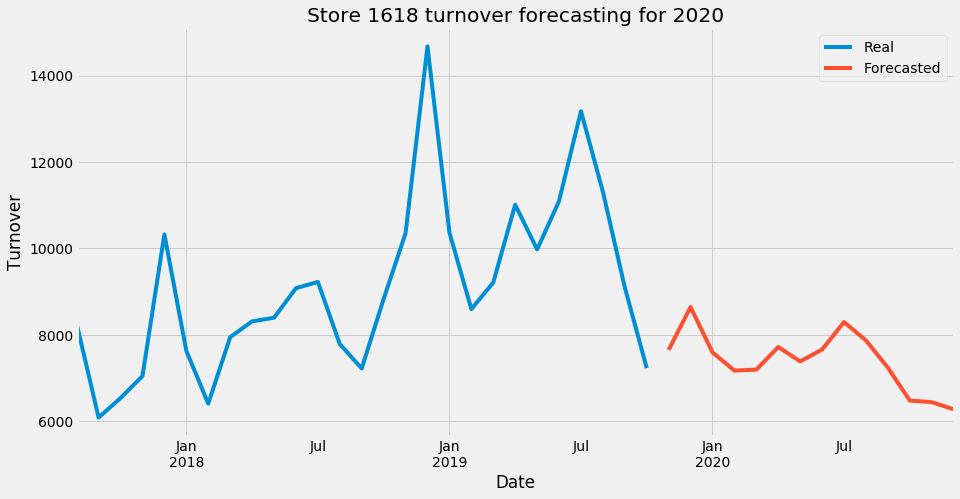

In [16]:
#predict the actual timeframe

pred_uc = results.get_forecast("2020-12-01")
ax = store_1618_monthly.plot(label="Real", figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label="Forecasted")

ax.set_xlabel("Date")
ax.set_ylabel("Turnover")
plt.title("Store 1618 turnover forecasting for 2020")
plt.legend()
plt.show()

## Store 1614


In [17]:
store_1614 = store_1614[["date","turnover"]]

In [18]:
adfuller_test(store_1614["turnover"])

ADF Test Statistic : -17.54319265933381
p-value : 4.178954383668022e-30
#Lags Used : 40
Number of Observations Used : 20041
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [19]:
store_1614=store_1614.set_index("date")

In [20]:
store_1614_monthly = store_1614["turnover"].resample("MS").mean()
store_1614_monthly

date
2017-08-01   4890.80
2017-09-01   4016.16
2017-10-01   4918.80
2017-11-01   5364.10
2017-12-01   7439.60
2018-01-01   5044.47
2018-02-01   4550.68
2018-03-01   5939.77
2018-04-01   6251.30
2018-05-01   6220.22
2018-06-01   6279.92
2018-07-01   6367.88
2018-08-01   5546.26
2018-09-01   5243.52
2018-10-01   6138.04
2018-11-01   6495.89
2018-12-01   8607.83
2019-01-01   5652.51
2019-02-01   4945.38
2019-03-01   5483.00
2019-04-01   6452.63
2019-05-01   5772.64
2019-06-01   6390.34
2019-07-01   6736.62
2019-08-01   6014.34
2019-09-01   5144.73
2019-10-01   4634.96
Freq: MS, Name: turnover, dtype: float64

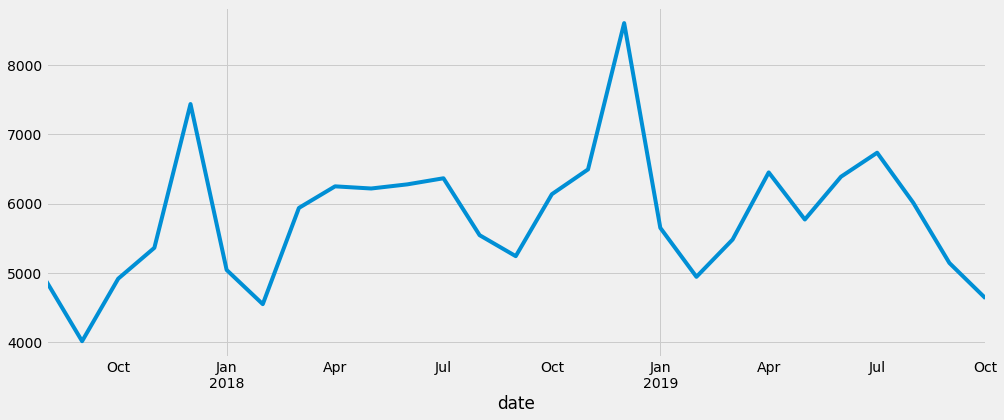

In [21]:
store_1614_monthly.plot(figsize=(15, 6))

In [22]:
aiclist=[]
paramlist=[]
seasparamlist=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        model_arima = sm.tsa.statespace.SARIMAX(store_1614_monthly,order=param,
                                               seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        start_params = np.r_[[0] * (model_arima.k_params - 1), 1] #change add whole statement

        model_arima_fit = model_arima.fit(start_params=start_params)
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, model_arima_fit.aic))
        aiclist.append(model_arima_fit.aic)
        seasparamlist.append(param_seasonal)
        paramlist.append(param)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:527.3839410485624
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:250.7382995989849
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:38.62749518373408
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:229.3457524921797
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:35.75736182054823
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:38.36973362844941
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:245.00298776544363
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:232.0397825650106
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:39.422819578280205
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:52.24824548643305
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:37.87159089173457
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:53.69208150164649
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:55.36158654702

ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:-4.799374285787572
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:7.89160036924499
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:9.891597114078966
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:400.092076569908
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:190.47976355489297
ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:178.12363591623856
ARIMA(0, 2, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 2

ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:411.28031554851816
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:209.55265848803353
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:194.4020865462584
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 1)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:211.1591019691058
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:198.19880823371787
ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:11.341361858869124
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:12.055063533510552
ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:14.055063571586958
ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 

ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:14.720185294674604
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:16.72018530830781
ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:18.72018413553252
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:413.4277336276148
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:207.7069353323985
ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:195.87889158496156
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:212.91238597303465
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:197.54686665786534
ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 0

ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:18.0


In [23]:
#change
pd.options.display.float_format = '{:.2f}'.format
test=pd.DataFrame(list(zip(paramlist,seasparamlist,aiclist)),columns=["param","param_seas","aic"]) #chg
test=test.sort_values("aic")
ns_order=test["param"].iloc[0]
s_order=test["param_seas"].iloc[0]


In [24]:
mod = sm.tsa.statespace.SARIMAX(store_1614_monthly,order=ns_order,seasonal_order=s_order,
                                eenforce_invertibility=False)
start_params = np.r_[[0] * (mod.k_params - 1), 1] #change add whole statement
                                
results = mod.fit(start_params=start_params)

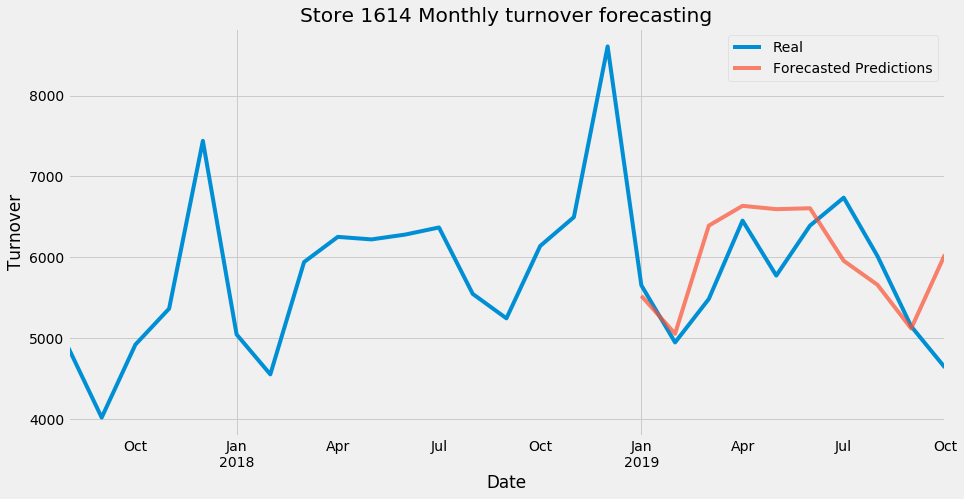

The Root Mean Squared Error of our forecasts is 655.73


In [25]:
pred = results.get_prediction("2019-01-01", dynamic=False)
ax = store_1614_monthly["2017":].plot(label="Real")
pred.predicted_mean.plot(ax=ax, label="Forecasted Predictions", alpha=.7, figsize=(14, 7))
ax.set_xlabel("Date")
ax.set_ylabel("Turnover")
plt.legend()
plt.title("Store 1614 Monthly turnover forecasting")
plt.show()
y_forecasted = pred.predicted_mean
y_truth = store_1614_monthly["2017-08-01":]
mse = ((y_forecasted - y_truth) ** 2).mean()
print("The Root Mean Squared Error of our forecasts is {}".format(round(np.sqrt(mse), 2)))

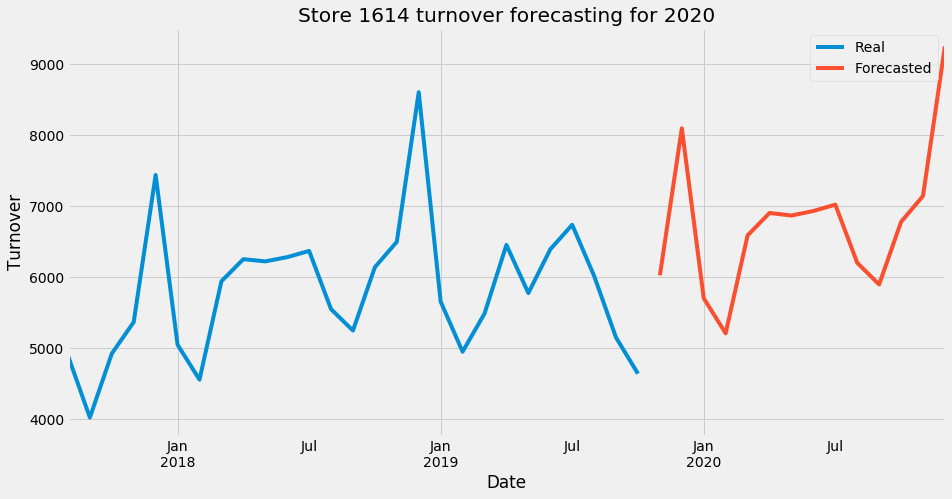

In [26]:
pred_uc = results.get_forecast("2020-12-01")
ax = store_1614_monthly.plot(label="Real", figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label="Forecasted")
ax.set_xlabel("Date")
ax.set_ylabel("Turnover")
plt.title("Store 1614 turnover forecasting for 2020")
plt.legend()
plt.show()

## Store 191

In [27]:
store_191 = store_191[["date","turnover"]]
adfuller_test(store_191["turnover"])

ADF Test Statistic : -12.472553972942594
p-value : 3.2207329155031794e-23
#Lags Used : 42
Number of Observations Used : 16046
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [28]:
store_191=store_191.set_index("date")
store_191_monthly = store_191["turnover"].resample("MS").mean()


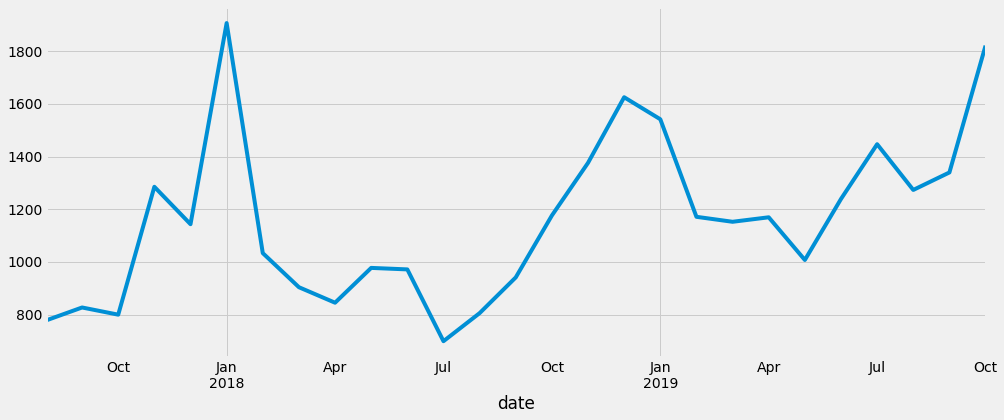

In [29]:
store_191_monthly.plot(figsize=(15, 6))

In [30]:
aiclist=[] #2 change add list
paramlist=[] 
seasparamlist=[]


for param in pdq:
    for param_seasonal in seasonal_pdq:
        model_arima = sm.tsa.statespace.SARIMAX(store_191_monthly,order=param,
                                               seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        start_params = np.r_[[0] * (model_arima.k_params - 1), 1] #change add whole statement
        model_arima_fit = model_arima.fit(start_params=start_params) 
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, model_arima_fit.aic))
        aiclist.append(model_arima_fit.aic) #2 change add list
        seasparamlist.append(param_seasonal)
        paramlist.append(param)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:444.9710230107267
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:234.30961052045427
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:38.50113508488045
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:208.85052914507006
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:33.854520493050366
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:30.164453722669045
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:218.82087441587237
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:207.31871191276318
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:30.344726260273426
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:45.9789778940965
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:31.372407613280572
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:39.18664118506286
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:41.186627

ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:58.0125622241035
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 2, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:-5.1670170438770615
ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:-1.4210820975725067
ARIMA(0, 2, 0)x(2, 0, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 1, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:6.0
ARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:8.0
ARIMA(0, 2, 0)x(2, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:335.700469913468
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:158.72350787351687
ARIMA(0, 2, 1)x(0, 0, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:167.7294953945794
ARIMA(0, 2, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 2, 1)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:4.0
ARIMA(0,

ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:346.5740684800228
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:166.20846163631649
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:175.71674847406638
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 1)x(0, 2, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:185.02274353859713
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:172.33319413772324
ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2.273962022152781
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:11.845692593155945
ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:12.92079175394965
ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 1

ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:14.856160264268167
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:16.856157929057243
ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:18.856158543321477
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:349.7033386928777
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:170.8364765280401
ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:182.61483135481757
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:186.3136174965922
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:175.36289101231122
ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 

ARIMA(2, 2, 2)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:18.0


In [31]:
#change

test=pd.DataFrame(list(zip(paramlist,seasparamlist,aiclist)),columns=["param","param_seas","aic"]) #chg
test=test.sort_values("aic")
ns_order=test["param"].iloc[0]
s_order=test["param_seas"].iloc[0]

In [32]:
mod = sm.tsa.statespace.SARIMAX(store_191_monthly,order=ns_order,seasonal_order=s_order, #3 change to lowest aic
                                eenforce_invertibility=False)
start_params = np.r_[[0] * (mod.k_params - 1), 1] #change add whole statement
                                
results = mod.fit(start_params=start_params)

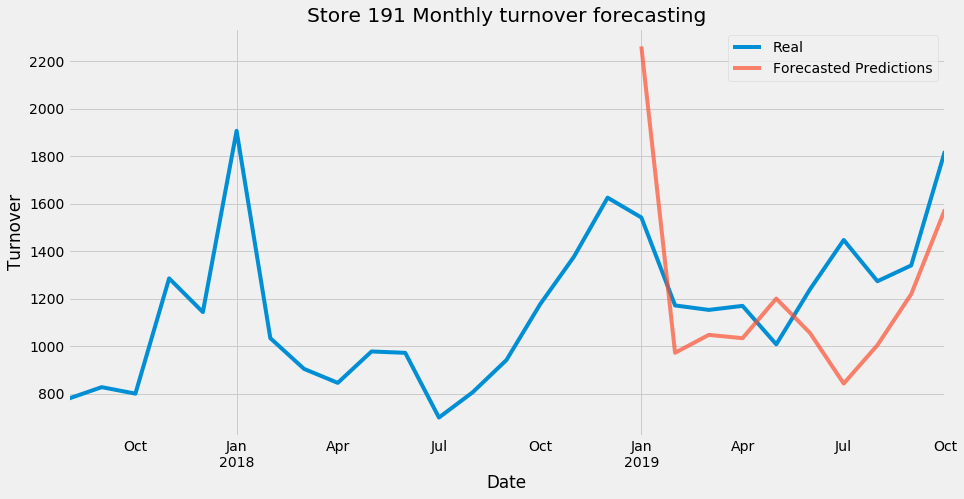

The Root Mean Squared Error of our forecasts is 342.48


In [33]:
pred = results.get_prediction('2019-01-01', dynamic=False)

ax = store_191_monthly['2017':].plot(label='Real')
pred.predicted_mean.plot(ax=ax, label='Forecasted Predictions', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Turnover')
plt.title('Store 191 Monthly turnover forecasting')
plt.legend()
plt.show()
y_forecasted = pred.predicted_mean
y_truth = store_191_monthly['2017-08-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

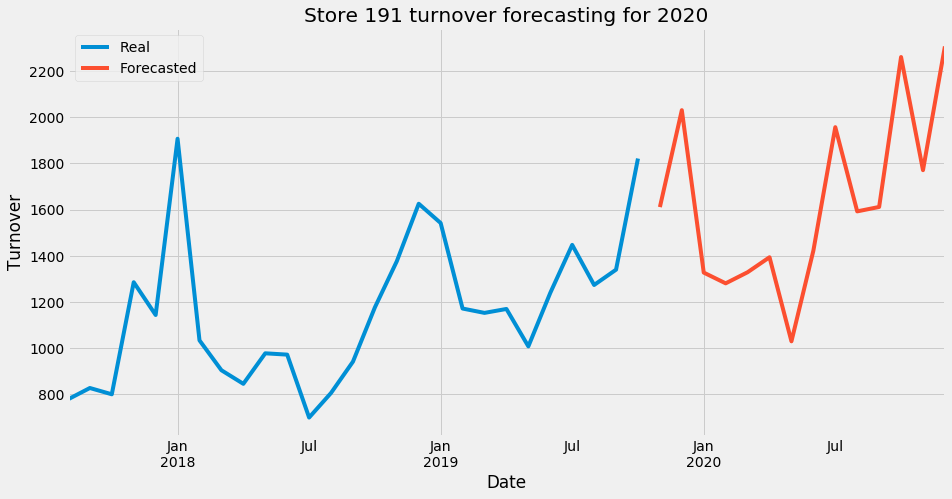

In [34]:
pred_uc = results.get_forecast('2020-12-01') #4 change this to -01 start of month
ax = store_191_monthly.plot(label='Real', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecasted')
ax.set_xlabel('Date')
ax.set_ylabel('Turnover')
plt.title('Store 191 turnover forecasting for 2020')
plt.legend()
plt.show()

## Store 2350

In [35]:
store_2350= store_2350[["date","turnover"]]
adfuller_test(store_2350["turnover"])

ADF Test Statistic : -5.857736577863187
p-value : 3.4680776212833846e-07
#Lags Used : 29
Number of Observations Used : 3750
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [36]:
store_2350.shape

(3780, 2)

In [37]:
store_2350=store_2350.set_index("date")
store_2350_monthly = store_2350["turnover"].resample("MS").mean()
store_2350_monthly

date
2019-06-01   8686.46
2019-07-01   6652.60
2019-08-01   4719.92
2019-09-01   4086.75
2019-10-01   3422.55
Freq: MS, Name: turnover, dtype: float64

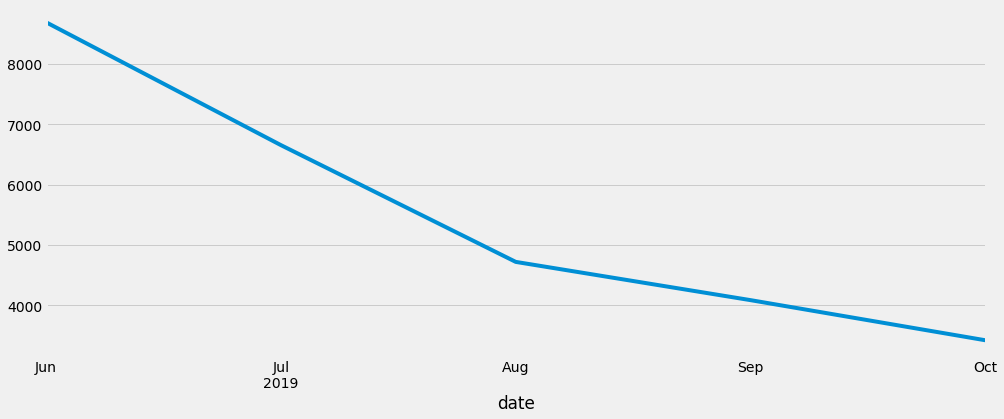

In [38]:
store_2350_monthly.plot(figsize=(15, 6))

In [39]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
aiclist=[]
paramlist=[]
seasparamlist=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        model_arima = sm.tsa.statespace.SARIMAX(store_2350_monthly,order=param,
                                               seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        start_params = np.r_[[0] * (model_arima.k_params - 1), 1] #change add whole statement

        model_arima_fit = model_arima.fit(start_params=start_params)
        print("ARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, model_arima_fit.aic))

        aiclist.append(model_arima_fit.aic)
        seasparamlist.append(param_seasonal)
        paramlist.append(param)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:81.28593502043293
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:10.0
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 0)x(2, 1, 2, 12)12 - AIC:10.0


ARIMA(0, 1, 2)x(0, 2, 2, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 3)x(0, 0, 1, 12)12 - AIC:10.0
ARIMA(0, 1, 3)x(0, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 1, 3)x(0, 1, 1, 12)12 - AIC:10

ARIMA(0, 2, 4)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(0, 2, 4)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(0, 2, 4)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(0, 2, 4)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(0, 2, 4)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(0, 2, 4)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(0, 2, 4)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(0, 2, 4)x(2, 2, 2, 12)12 - AIC:18.0
ARIMA(0, 3, 0)x(0, 0, 0, 12)12 - AIC:19.22474426474559
ARIMA(0, 3, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 3, 0)x(0, 0, 2, 12)12 - AIC:6.0
ARIMA(0, 3, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 3, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 3, 0)x(0, 1, 2, 12)12 - AIC:6.0
ARIMA(0, 3, 0)x(0, 2, 0, 12)12 - AIC:2.0
ARIMA(0, 3, 0)x(0, 2, 1, 12)12 - AIC:4.0
ARIMA(0, 3, 0)x(0, 2, 2, 12)12 - AIC:6.0
ARIMA(0, 3, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 3, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 3, 0)x(1, 0, 2, 12)12 - AIC:8.0
ARIMA(0, 3, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 3, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 3, 0)x(1, 1, 2, 12)12 - AIC:8.0
ARIMA(0, 3, 0)x(1, 2, 0, 12)12 - AI

ARIMA(0, 4, 2)x(1, 0, 1, 12)12 - AIC:10.0
ARIMA(0, 4, 2)x(1, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 4, 2)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 4, 2)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 4, 2)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 4, 2)x(1, 2, 0, 12)12 - AIC:8.0
ARIMA(0, 4, 2)x(1, 2, 1, 12)12 - AIC:10.0
ARIMA(0, 4, 2)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(0, 4, 2)x(2, 0, 0, 12)12 - AIC:10.0
ARIMA(0, 4, 2)x(2, 0, 1, 12)12 - AIC:12.0
ARIMA(0, 4, 2)x(2, 0, 2, 12)12 - AIC:14.0
ARIMA(0, 4, 2)x(2, 1, 0, 12)12 - AIC:10.0
ARIMA(0, 4, 2)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(0, 4, 2)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(0, 4, 2)x(2, 2, 0, 12)12 - AIC:10.0
ARIMA(0, 4, 2)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(0, 4, 2)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(0, 4, 3)x(0, 0, 0, 12)12 - AIC:8.0
ARIMA(0, 4, 3)x(0, 0, 1, 12)12 - AIC:10.0
ARIMA(0, 4, 3)x(0, 0, 2, 12)12 - AIC:12.0
ARIMA(0, 4, 3)x(0, 1, 0, 12)12 - AIC:8.0
ARIMA(0, 4, 3)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(0, 4, 3)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(0, 4, 3)x(0, 2, 0, 12)12 - AIC:8

ARIMA(1, 0, 4)x(1, 2, 2, 12)12 - AIC:18.0
ARIMA(1, 0, 4)x(2, 0, 0, 12)12 - AIC:16.0
ARIMA(1, 0, 4)x(2, 0, 1, 12)12 - AIC:18.0
ARIMA(1, 0, 4)x(2, 0, 2, 12)12 - AIC:20.0
ARIMA(1, 0, 4)x(2, 1, 0, 12)12 - AIC:16.0
ARIMA(1, 0, 4)x(2, 1, 1, 12)12 - AIC:18.0
ARIMA(1, 0, 4)x(2, 1, 2, 12)12 - AIC:20.0
ARIMA(1, 0, 4)x(2, 2, 0, 12)12 - AIC:16.0
ARIMA(1, 0, 4)x(2, 2, 1, 12)12 - AIC:18.0
ARIMA(1, 0, 4)x(2, 2, 2, 12)12 - AIC:20.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:50.0698076932447
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:4.0
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - 

ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:10.0
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:8.0
ARIMA(1, 2, 2)x(0, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 2, 2)x(0, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:10.0
ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(1, 0, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:10.0
ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(1, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:10.0
ARIMA(1, 2, 2)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:14.0
ARIMA(1, 2, 2)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:

ARIMA(1, 3, 4)x(1, 0, 0, 12)12 - AIC:14.0
ARIMA(1, 3, 4)x(1, 0, 1, 12)12 - AIC:16.0
ARIMA(1, 3, 4)x(1, 0, 2, 12)12 - AIC:18.0
ARIMA(1, 3, 4)x(1, 1, 0, 12)12 - AIC:14.0
ARIMA(1, 3, 4)x(1, 1, 1, 12)12 - AIC:16.0
ARIMA(1, 3, 4)x(1, 1, 2, 12)12 - AIC:18.0
ARIMA(1, 3, 4)x(1, 2, 0, 12)12 - AIC:14.0
ARIMA(1, 3, 4)x(1, 2, 1, 12)12 - AIC:16.0
ARIMA(1, 3, 4)x(1, 2, 2, 12)12 - AIC:18.0
ARIMA(1, 3, 4)x(2, 0, 0, 12)12 - AIC:16.0
ARIMA(1, 3, 4)x(2, 0, 1, 12)12 - AIC:18.0
ARIMA(1, 3, 4)x(2, 0, 2, 12)12 - AIC:20.0
ARIMA(1, 3, 4)x(2, 1, 0, 12)12 - AIC:16.0
ARIMA(1, 3, 4)x(2, 1, 1, 12)12 - AIC:18.0
ARIMA(1, 3, 4)x(2, 1, 2, 12)12 - AIC:20.0
ARIMA(1, 3, 4)x(2, 2, 0, 12)12 - AIC:16.0
ARIMA(1, 3, 4)x(2, 2, 1, 12)12 - AIC:18.0
ARIMA(1, 3, 4)x(2, 2, 2, 12)12 - AIC:20.0
ARIMA(1, 4, 0)x(0, 0, 0, 12)12 - AIC:4.0
ARIMA(1, 4, 0)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(1, 4, 0)x(0, 0, 2, 12)12 - AIC:8.0
ARIMA(1, 4, 0)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(1, 4, 0)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(1, 4, 0)x(0, 1, 2, 12)12 - AIC:8.

ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:6.788562144612569
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 0, 2)x(1, 1,

ARIMA(2, 1, 4)x(0, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 1, 4)x(0, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 1, 4)x(0, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 1, 4)x(0, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 1, 4)x(0, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 1, 4)x(0, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 1, 4)x(0, 2, 2, 12)12 - AIC:18.0
ARIMA(2, 1, 4)x(1, 0, 0, 12)12 - AIC:16.0
ARIMA(2, 1, 4)x(1, 0, 1, 12)12 - AIC:18.0
ARIMA(2, 1, 4)x(1, 0, 2, 12)12 - AIC:20.0
ARIMA(2, 1, 4)x(1, 1, 0, 12)12 - AIC:16.0
ARIMA(2, 1, 4)x(1, 1, 1, 12)12 - AIC:18.0
ARIMA(2, 1, 4)x(1, 1, 2, 12)12 - AIC:20.0
ARIMA(2, 1, 4)x(1, 2, 0, 12)12 - AIC:16.0
ARIMA(2, 1, 4)x(1, 2, 1, 12)12 - AIC:18.0
ARIMA(2, 1, 4)x(1, 2, 2, 12)12 - AIC:20.0
ARIMA(2, 1, 4)x(2, 0, 0, 12)12 - AIC:18.0
ARIMA(2, 1, 4)x(2, 0, 1, 12)12 - AIC:20.0
ARIMA(2, 1, 4)x(2, 0, 2, 12)12 - AIC:22.0
ARIMA(2, 1, 4)x(2, 1, 0, 12)12 - AIC:18.0
ARIMA(2, 1, 4)x(2, 1, 1, 12)12 - AIC:20.0
ARIMA(2, 1, 4)x(2, 1, 2, 12)12 - AIC:22.0
ARIMA(2, 1, 4)x(2, 2, 0, 12)12 - AIC:18.0
ARIMA(2, 1, 4)x(2, 2, 1, 12)12 - A

ARIMA(2, 3, 1)x(1, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 3, 1)x(1, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 3, 1)x(2, 0, 0, 12)12 - AIC:12.0
ARIMA(2, 3, 1)x(2, 0, 1, 12)12 - AIC:14.0
ARIMA(2, 3, 1)x(2, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 3, 1)x(2, 1, 0, 12)12 - AIC:12.0
ARIMA(2, 3, 1)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(2, 3, 1)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(2, 3, 1)x(2, 2, 0, 12)12 - AIC:12.0
ARIMA(2, 3, 1)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(2, 3, 1)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(2, 3, 2)x(0, 0, 0, 12)12 - AIC:10.0
ARIMA(2, 3, 2)x(0, 0, 1, 12)12 - AIC:12.0
ARIMA(2, 3, 2)x(0, 0, 2, 12)12 - AIC:14.0
ARIMA(2, 3, 2)x(0, 1, 0, 12)12 - AIC:10.0
ARIMA(2, 3, 2)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(2, 3, 2)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(2, 3, 2)x(0, 2, 0, 12)12 - AIC:10.0
ARIMA(2, 3, 2)x(0, 2, 1, 12)12 - AIC:12.0
ARIMA(2, 3, 2)x(0, 2, 2, 12)12 - AIC:14.0
ARIMA(2, 3, 2)x(1, 0, 0, 12)12 - AIC:12.0
ARIMA(2, 3, 2)x(1, 0, 1, 12)12 - AIC:14.0
ARIMA(2, 3, 2)x(1, 0, 2, 12)12 - AIC:16.0
ARIMA(2, 3, 2)x(1, 1, 0, 12)12 - A

ARIMA(2, 4, 4)x(0, 0, 2, 12)12 - AIC:18.0
ARIMA(2, 4, 4)x(0, 1, 0, 12)12 - AIC:14.0
ARIMA(2, 4, 4)x(0, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 4, 4)x(0, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 4, 4)x(0, 2, 0, 12)12 - AIC:14.0
ARIMA(2, 4, 4)x(0, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 4, 4)x(0, 2, 2, 12)12 - AIC:18.0
ARIMA(2, 4, 4)x(1, 0, 0, 12)12 - AIC:16.0
ARIMA(2, 4, 4)x(1, 0, 1, 12)12 - AIC:18.0
ARIMA(2, 4, 4)x(1, 0, 2, 12)12 - AIC:20.0
ARIMA(2, 4, 4)x(1, 1, 0, 12)12 - AIC:16.0
ARIMA(2, 4, 4)x(1, 1, 1, 12)12 - AIC:18.0
ARIMA(2, 4, 4)x(1, 1, 2, 12)12 - AIC:20.0
ARIMA(2, 4, 4)x(1, 2, 0, 12)12 - AIC:16.0
ARIMA(2, 4, 4)x(1, 2, 1, 12)12 - AIC:18.0
ARIMA(2, 4, 4)x(1, 2, 2, 12)12 - AIC:20.0
ARIMA(2, 4, 4)x(2, 0, 0, 12)12 - AIC:18.0
ARIMA(2, 4, 4)x(2, 0, 1, 12)12 - AIC:20.0
ARIMA(2, 4, 4)x(2, 0, 2, 12)12 - AIC:22.0
ARIMA(2, 4, 4)x(2, 1, 0, 12)12 - AIC:18.0
ARIMA(2, 4, 4)x(2, 1, 1, 12)12 - AIC:20.0
ARIMA(2, 4, 4)x(2, 1, 2, 12)12 - AIC:22.0
ARIMA(2, 4, 4)x(2, 2, 0, 12)12 - AIC:18.0
ARIMA(2, 4, 4)x(2, 2, 1, 12)12 - A

ARIMA(3, 1, 1)x(1, 2, 1, 12)12 - AIC:14.0
ARIMA(3, 1, 1)x(1, 2, 2, 12)12 - AIC:16.0
ARIMA(3, 1, 1)x(2, 0, 0, 12)12 - AIC:14.0
ARIMA(3, 1, 1)x(2, 0, 1, 12)12 - AIC:16.0
ARIMA(3, 1, 1)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(3, 1, 1)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(3, 1, 1)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(3, 1, 1)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(3, 1, 1)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(3, 1, 1)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(3, 1, 1)x(2, 2, 2, 12)12 - AIC:18.0
ARIMA(3, 1, 2)x(0, 0, 0, 12)12 - AIC:13.947579104512982
ARIMA(3, 1, 2)x(0, 0, 1, 12)12 - AIC:14.0
ARIMA(3, 1, 2)x(0, 0, 2, 12)12 - AIC:16.0
ARIMA(3, 1, 2)x(0, 1, 0, 12)12 - AIC:12.0
ARIMA(3, 1, 2)x(0, 1, 1, 12)12 - AIC:14.0
ARIMA(3, 1, 2)x(0, 1, 2, 12)12 - AIC:16.0
ARIMA(3, 1, 2)x(0, 2, 0, 12)12 - AIC:12.0
ARIMA(3, 1, 2)x(0, 2, 1, 12)12 - AIC:14.0
ARIMA(3, 1, 2)x(0, 2, 2, 12)12 - AIC:16.0
ARIMA(3, 1, 2)x(1, 0, 0, 12)12 - AIC:14.0
ARIMA(3, 1, 2)x(1, 0, 1, 12)12 - AIC:16.0
ARIMA(3, 1, 2)x(1, 0, 2, 12)12 - AIC:18.0
ARIMA(3, 1, 2)x(1, 1

ARIMA(3, 2, 4)x(0, 1, 2, 12)12 - AIC:20.0
ARIMA(3, 2, 4)x(0, 2, 0, 12)12 - AIC:16.0
ARIMA(3, 2, 4)x(0, 2, 1, 12)12 - AIC:18.0
ARIMA(3, 2, 4)x(0, 2, 2, 12)12 - AIC:20.0
ARIMA(3, 2, 4)x(1, 0, 0, 12)12 - AIC:18.0
ARIMA(3, 2, 4)x(1, 0, 1, 12)12 - AIC:20.0
ARIMA(3, 2, 4)x(1, 0, 2, 12)12 - AIC:22.0
ARIMA(3, 2, 4)x(1, 1, 0, 12)12 - AIC:18.0
ARIMA(3, 2, 4)x(1, 1, 1, 12)12 - AIC:20.0
ARIMA(3, 2, 4)x(1, 1, 2, 12)12 - AIC:22.0
ARIMA(3, 2, 4)x(1, 2, 0, 12)12 - AIC:18.0
ARIMA(3, 2, 4)x(1, 2, 1, 12)12 - AIC:20.0
ARIMA(3, 2, 4)x(1, 2, 2, 12)12 - AIC:22.0
ARIMA(3, 2, 4)x(2, 0, 0, 12)12 - AIC:20.0
ARIMA(3, 2, 4)x(2, 0, 1, 12)12 - AIC:22.0
ARIMA(3, 2, 4)x(2, 0, 2, 12)12 - AIC:24.0
ARIMA(3, 2, 4)x(2, 1, 0, 12)12 - AIC:20.0
ARIMA(3, 2, 4)x(2, 1, 1, 12)12 - AIC:22.0
ARIMA(3, 2, 4)x(2, 1, 2, 12)12 - AIC:24.0
ARIMA(3, 2, 4)x(2, 2, 0, 12)12 - AIC:20.0
ARIMA(3, 2, 4)x(2, 2, 1, 12)12 - AIC:22.0
ARIMA(3, 2, 4)x(2, 2, 2, 12)12 - AIC:24.0
ARIMA(3, 3, 0)x(0, 0, 0, 12)12 - AIC:8.0
ARIMA(3, 3, 0)x(0, 0, 1, 12)12 - AI

ARIMA(3, 4, 1)x(2, 0, 2, 12)12 - AIC:18.0
ARIMA(3, 4, 1)x(2, 1, 0, 12)12 - AIC:14.0
ARIMA(3, 4, 1)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(3, 4, 1)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(3, 4, 1)x(2, 2, 0, 12)12 - AIC:14.0
ARIMA(3, 4, 1)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(3, 4, 1)x(2, 2, 2, 12)12 - AIC:18.0
ARIMA(3, 4, 2)x(0, 0, 0, 12)12 - AIC:12.0
ARIMA(3, 4, 2)x(0, 0, 1, 12)12 - AIC:14.0
ARIMA(3, 4, 2)x(0, 0, 2, 12)12 - AIC:16.0
ARIMA(3, 4, 2)x(0, 1, 0, 12)12 - AIC:12.0
ARIMA(3, 4, 2)x(0, 1, 1, 12)12 - AIC:14.0
ARIMA(3, 4, 2)x(0, 1, 2, 12)12 - AIC:16.0
ARIMA(3, 4, 2)x(0, 2, 0, 12)12 - AIC:12.0
ARIMA(3, 4, 2)x(0, 2, 1, 12)12 - AIC:14.0
ARIMA(3, 4, 2)x(0, 2, 2, 12)12 - AIC:16.0
ARIMA(3, 4, 2)x(1, 0, 0, 12)12 - AIC:14.0
ARIMA(3, 4, 2)x(1, 0, 1, 12)12 - AIC:16.0
ARIMA(3, 4, 2)x(1, 0, 2, 12)12 - AIC:18.0
ARIMA(3, 4, 2)x(1, 1, 0, 12)12 - AIC:14.0
ARIMA(3, 4, 2)x(1, 1, 1, 12)12 - AIC:16.0
ARIMA(3, 4, 2)x(1, 1, 2, 12)12 - AIC:18.0
ARIMA(3, 4, 2)x(1, 2, 0, 12)12 - AIC:14.0
ARIMA(3, 4, 2)x(1, 2, 1, 12)12 - A

ARIMA(4, 0, 4)x(1, 0, 2, 12)12 - AIC:24.0
ARIMA(4, 0, 4)x(1, 1, 0, 12)12 - AIC:20.0
ARIMA(4, 0, 4)x(1, 1, 1, 12)12 - AIC:22.0
ARIMA(4, 0, 4)x(1, 1, 2, 12)12 - AIC:24.0
ARIMA(4, 0, 4)x(1, 2, 0, 12)12 - AIC:20.0
ARIMA(4, 0, 4)x(1, 2, 1, 12)12 - AIC:22.0
ARIMA(4, 0, 4)x(1, 2, 2, 12)12 - AIC:24.0
ARIMA(4, 0, 4)x(2, 0, 0, 12)12 - AIC:22.0
ARIMA(4, 0, 4)x(2, 0, 1, 12)12 - AIC:24.0
ARIMA(4, 0, 4)x(2, 0, 2, 12)12 - AIC:26.0
ARIMA(4, 0, 4)x(2, 1, 0, 12)12 - AIC:22.0
ARIMA(4, 0, 4)x(2, 1, 1, 12)12 - AIC:24.0
ARIMA(4, 0, 4)x(2, 1, 2, 12)12 - AIC:26.0
ARIMA(4, 0, 4)x(2, 2, 0, 12)12 - AIC:22.0
ARIMA(4, 0, 4)x(2, 2, 1, 12)12 - AIC:24.0
ARIMA(4, 0, 4)x(2, 2, 2, 12)12 - AIC:26.0
ARIMA(4, 1, 0)x(0, 0, 0, 12)12 - AIC:10.0
ARIMA(4, 1, 0)x(0, 0, 1, 12)12 - AIC:12.0
ARIMA(4, 1, 0)x(0, 0, 2, 12)12 - AIC:14.0
ARIMA(4, 1, 0)x(0, 1, 0, 12)12 - AIC:10.0
ARIMA(4, 1, 0)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(4, 1, 0)x(0, 1, 2, 12)12 - AIC:14.0
ARIMA(4, 1, 0)x(0, 2, 0, 12)12 - AIC:10.0
ARIMA(4, 1, 0)x(0, 2, 1, 12)12 - A

ARIMA(4, 2, 1)x(2, 1, 1, 12)12 - AIC:18.0
ARIMA(4, 2, 1)x(2, 1, 2, 12)12 - AIC:20.0
ARIMA(4, 2, 1)x(2, 2, 0, 12)12 - AIC:16.0
ARIMA(4, 2, 1)x(2, 2, 1, 12)12 - AIC:18.0
ARIMA(4, 2, 1)x(2, 2, 2, 12)12 - AIC:20.0
ARIMA(4, 2, 2)x(0, 0, 0, 12)12 - AIC:14.0
ARIMA(4, 2, 2)x(0, 0, 1, 12)12 - AIC:16.0
ARIMA(4, 2, 2)x(0, 0, 2, 12)12 - AIC:18.0
ARIMA(4, 2, 2)x(0, 1, 0, 12)12 - AIC:14.0
ARIMA(4, 2, 2)x(0, 1, 1, 12)12 - AIC:16.0
ARIMA(4, 2, 2)x(0, 1, 2, 12)12 - AIC:18.0
ARIMA(4, 2, 2)x(0, 2, 0, 12)12 - AIC:14.0
ARIMA(4, 2, 2)x(0, 2, 1, 12)12 - AIC:16.0
ARIMA(4, 2, 2)x(0, 2, 2, 12)12 - AIC:18.0
ARIMA(4, 2, 2)x(1, 0, 0, 12)12 - AIC:16.0
ARIMA(4, 2, 2)x(1, 0, 1, 12)12 - AIC:18.0
ARIMA(4, 2, 2)x(1, 0, 2, 12)12 - AIC:20.0
ARIMA(4, 2, 2)x(1, 1, 0, 12)12 - AIC:16.0
ARIMA(4, 2, 2)x(1, 1, 1, 12)12 - AIC:18.0
ARIMA(4, 2, 2)x(1, 1, 2, 12)12 - AIC:20.0
ARIMA(4, 2, 2)x(1, 2, 0, 12)12 - AIC:16.0
ARIMA(4, 2, 2)x(1, 2, 1, 12)12 - AIC:18.0
ARIMA(4, 2, 2)x(1, 2, 2, 12)12 - AIC:20.0
ARIMA(4, 2, 2)x(2, 0, 0, 12)12 - A

ARIMA(4, 3, 4)x(1, 0, 0, 12)12 - AIC:20.0
ARIMA(4, 3, 4)x(1, 0, 1, 12)12 - AIC:22.0
ARIMA(4, 3, 4)x(1, 0, 2, 12)12 - AIC:24.0
ARIMA(4, 3, 4)x(1, 1, 0, 12)12 - AIC:20.0
ARIMA(4, 3, 4)x(1, 1, 1, 12)12 - AIC:22.0
ARIMA(4, 3, 4)x(1, 1, 2, 12)12 - AIC:24.0
ARIMA(4, 3, 4)x(1, 2, 0, 12)12 - AIC:20.0
ARIMA(4, 3, 4)x(1, 2, 1, 12)12 - AIC:22.0
ARIMA(4, 3, 4)x(1, 2, 2, 12)12 - AIC:24.0
ARIMA(4, 3, 4)x(2, 0, 0, 12)12 - AIC:22.0
ARIMA(4, 3, 4)x(2, 0, 1, 12)12 - AIC:24.0
ARIMA(4, 3, 4)x(2, 0, 2, 12)12 - AIC:26.0
ARIMA(4, 3, 4)x(2, 1, 0, 12)12 - AIC:22.0
ARIMA(4, 3, 4)x(2, 1, 1, 12)12 - AIC:24.0
ARIMA(4, 3, 4)x(2, 1, 2, 12)12 - AIC:26.0
ARIMA(4, 3, 4)x(2, 2, 0, 12)12 - AIC:22.0
ARIMA(4, 3, 4)x(2, 2, 1, 12)12 - AIC:24.0
ARIMA(4, 3, 4)x(2, 2, 2, 12)12 - AIC:26.0
ARIMA(4, 4, 0)x(0, 0, 0, 12)12 - AIC:10.0
ARIMA(4, 4, 0)x(0, 0, 1, 12)12 - AIC:12.0
ARIMA(4, 4, 0)x(0, 0, 2, 12)12 - AIC:14.0
ARIMA(4, 4, 0)x(0, 1, 0, 12)12 - AIC:10.0
ARIMA(4, 4, 0)x(0, 1, 1, 12)12 - AIC:12.0
ARIMA(4, 4, 0)x(0, 1, 2, 12)12 - A

In [40]:
test=pd.DataFrame(list(zip(paramlist,seasparamlist,aiclist)),columns=["param","param_seas","aic"]) #chg
test=test.sort_values("aic")
ns_order=test["param"].iloc[0]
s_order=test["param_seas"].iloc[0]


In [41]:
mod = sm.tsa.statespace.SARIMAX(store_2350_monthly,order=ns_order,seasonal_order=s_order,
                                eenforce_invertibility=False)

start_params = np.r_[[0] * (mod.k_params - 1), 1] #change add whole statement                                
results = mod.fit(start_params=start_params)

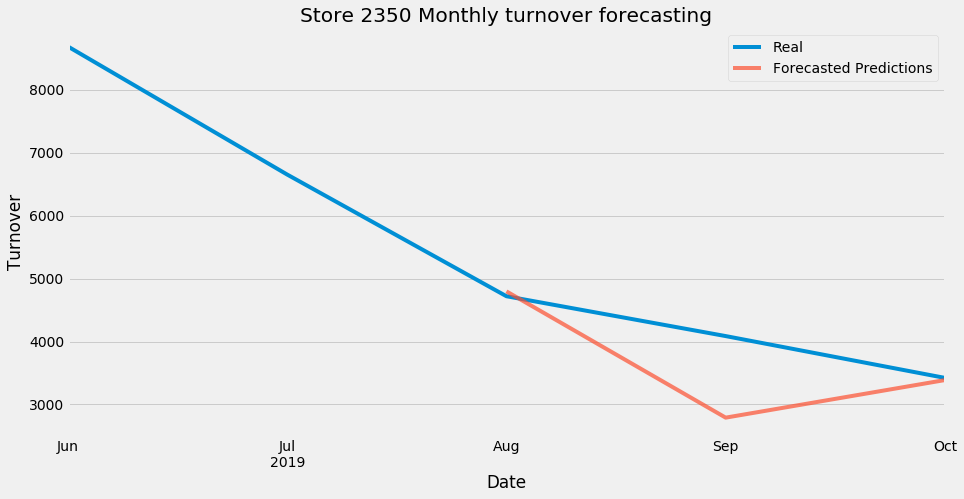

The Root Mean Squared Error of our forecasts is 749.61


In [42]:
pred = results.get_prediction("2019-08-01", dynamic=False)
ax = store_2350_monthly["2019-06-01":].plot(label="Real")
pred.predicted_mean.plot(ax=ax, label="Forecasted Predictions", alpha=.7, figsize=(14, 7))
ax.set_xlabel("Date")
ax.set_ylabel("Turnover")
plt.legend()
plt.title("Store 2350 Monthly turnover forecasting")
plt.show()
y_forecasted = pred.predicted_mean
y_truth = store_2350_monthly["2019-06-01":]
mse = ((y_forecasted - y_truth) ** 2).mean()
print("The Root Mean Squared Error of our forecasts is {}".format(round(np.sqrt(mse), 2)))

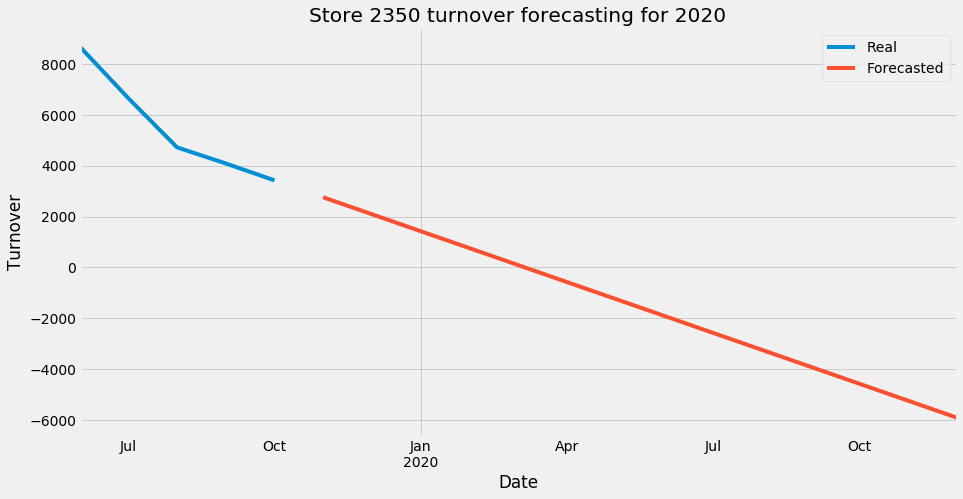

In [43]:
pred_uc = results.get_forecast("2020-12-01")
ax = store_2350_monthly.plot(label="Real", figsize=(14, 7)) #change here made mistakenly said other store name 1916
pred_uc.predicted_mean.plot(ax=ax, label="Forecasted")
ax.set_xlabel("Date")
ax.set_ylabel("Turnover")
plt.title("Store 2350 turnover forecasting for 2020")
plt.legend()
plt.show()

In [44]:
#pass